In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Q1


In [36]:
wages_data = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\Class Documents\\DS 3001\\assignment4\\data\\wages_hw.csv')
wages_data_cleaned = wages_data.dropna()

# Split the data into training and testing sets
X = wages_data_cleaned[['Rating', 'Size', 'Sector', 'job_state']]  # assuming these are the only features
y = wages_data_cleaned['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q2 


In [37]:
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[['Sector']])
X_test_encoded = encoder.transform(X_test[['Sector']])

# Create a linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_encoded)
r2 = model.score(X_test_encoded, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the performance metrics
print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


sector_coefs = pd.DataFrame(model.coef_, index=encoder.categories_[0], columns=['Coefficient'])
print(sector_coefs.sort_values(by='Coefficient', ascending=False))

R^2: 0.1320
RMSE: 36.11
                                    Coefficient
Media                                 27.921255
Accounting & Legal                    24.020914
Information Technology                22.675748
Biotech & Pharmaceuticals             22.330115
Finance                               13.021673
Mining & Metals                       13.020606
Real Estate                           12.521778
Insurance                             12.244915
Transportation & Logistics            12.022147
Education                             11.993942
Consumer Services                     10.393206
Business Services                     10.287019
-1                                     9.020944
Aerospace & Defense                    8.498971
Retail                                 1.299701
Manufacturing                         -7.030045
Agriculture & Forestry                -8.979021
Government                           -10.932692
Oil, Gas, Energy & Utilities         -11.128088
Telecommunicatio

- The **Media** sector predicts the highest wages, followed by **Accounting & Legal**, **Information Technology**, and **Biotech & Pharmaceuticals**.
- Sectors associated with lower wages include **Construction, Repair & Maintenance**, **Arts, Entertainment & Recreation**, and **Health Care**.
- The linear model has an \(R^2\) of 0.1320, explaining only 13.20% of the variance in `avg_salary`, with an RMSE of 36.11, indicating moderate predictive accuracy.

These results suggest that while the sector has an impact on wages, other factors are also important in accurately predicting average salaries.


# Q3

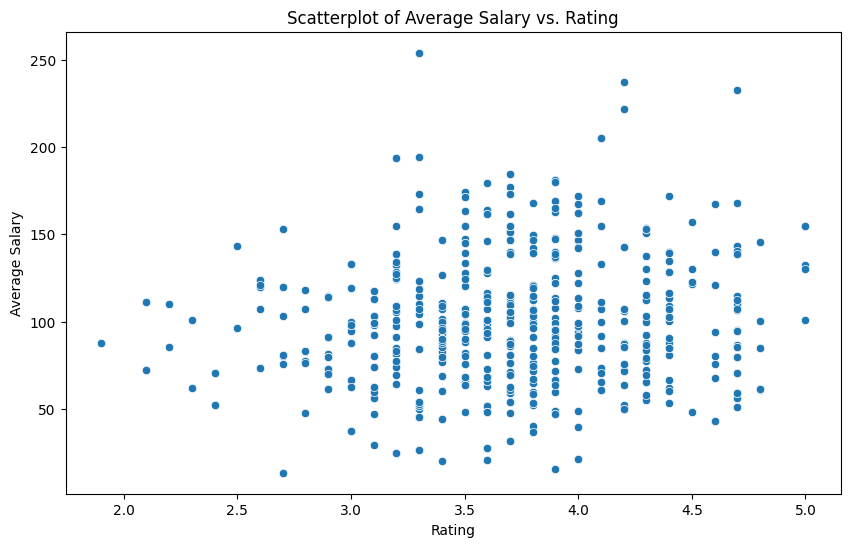

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='avg_salary', data=wages_data)
plt.title('Scatterplot of Average Salary vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()


In [39]:
# Linear regression with Rating as a numeric variable
X = wages_data[['Rating']]
y = wages_data['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2_numeric = lin_reg.score(X_test, y_test)
rmse_numeric = mean_squared_error(y_test, y_pred, squared=False)


In [40]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(wages_data[['Rating']])
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear regression with one-hot encoded Rating
lin_reg_encoded = LinearRegression()
lin_reg_encoded.fit(X_train_encoded, y_train)
y_pred_encoded = lin_reg_encoded.predict(X_test_encoded)
r2_encoded = lin_reg_encoded.score(X_test_encoded, y_test)
rmse_encoded = mean_squared_error(y_test, y_pred_encoded, squared=False)

# Display the R^2 and RMSE values
print(f"Numeric Rating Model - R^2: {r2_numeric:.4f}, RMSE: {rmse_numeric:.2f}")
print(f"One-Hot Encoded Rating Model - R^2: {r2_encoded:.4f}, RMSE: {rmse_encoded:.2f}")

Numeric Rating Model - R^2: -0.0026, RMSE: 38.82
One-Hot Encoded Rating Model - R^2: 0.0387, RMSE: 38.01


The scatterplot and regression analyses suggest a weak relationship between `avg_salary` and `Rating`. The numeric model, with an \(R^2\) of -0.0026, indicates no predictive power, and even less than a model predicting the mean salary. In contrast, the one-hot encoded model shows a slight improvement, with an \(R^2\) of 0.0387 and a lower RMSE of 38.01, indicating a marginal increase in prediction accuracy. However, both models demonstrate that `Rating` alone is not a strong predictor of `avg_salary`.


# Q4


In [41]:
encoder = OneHotEncoder()
X_categorical = wages_data[['Sector', 'Rating']]
X_categorical_encoded = encoder.fit_transform(X_categorical)

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = interaction.fit_transform(X_categorical_encoded)

y = wages_data['avg_salary']
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

In [42]:
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train)

# Predict on the test set
y_pred_interaction = model_interaction.predict(X_test_interaction)

# Calculate R^2 and RMSE
r2_interaction = model_interaction.score(X_test_interaction, y_test)
rmse_interaction = mean_squared_error(y_test, y_pred_interaction, squared=False)

In [43]:
feature_names = encoder.get_feature_names_out(['Sector', 'Rating'])
extended_feature_names = interaction.get_feature_names_out(feature_names)

# Pair coefficients with feature names
coefficients = model_interaction.coef_
features_coefficients = zip(extended_feature_names, coefficients)
sorted_features_coefficients = sorted(features_coefficients, key=lambda x: x[1], reverse=True)

print(f'Interaction Model - R^2: {r2_interaction:.4f}, RMSE: {rmse_interaction:.2f}')
print("Top sector-rating pairs with the highest wages:")
print(sorted_features_coefficients[:5])

Interaction Model - R^2: 0.1762, RMSE: 35.18
Top sector-rating pairs with the highest wages:
[('Sector_Health Care Rating_4.2', 118.96504482516049), ('Sector_Finance Rating_3.3', 64.04527021655373), ('Sector_Finance Rating_4.4', 63.55621658692116), ('Sector_Business Services Rating_3.6', 57.55882154761711), ('Sector_Information Technology Rating_4.1', 45.901365037818536)]


The interaction model, which includes (Sector, Rating) pairs, yielded an \(R^2\) of 0.1762 and an RMSE of 35.18. Compared to part 2, where only `Sector` was used, the interaction model demonstrates improved predictive power and accuracy, indicating that the combination of `Sector` and `Rating` provides additional insights into wage predictions.

The coefficients reveal that the highest wages are predicted for the **Health Care sector with a Rating of 4.2**, followed by the **Finance sector with Ratings of 3.3 and 4.4**, and other significant interactions in **Business Services and Information Technology**. This suggests that within certain sectors, a high rating is strongly associated with higher wages.


# Q5

In [44]:
categorical_cols = ['Sector', 'Rating', 'job_state', 'Size']
numerical_cols = [col for col in wages_data_cleaned.columns if col not in categorical_cols + ['avg_salary']]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = make_pipeline(
    preprocessor,
    LinearRegression()
)

In [47]:
X = wages_data_cleaned.drop('avg_salary', axis=1)
y = wages_data_cleaned['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Linear Regression on all variables - R^2: {r2:.4f}, RMSE: {rmse:.2f}')

Linear Regression on all variables - R^2: 0.2582, RMSE: 33.39


Running a linear regression on all variables resulted in an \(R^2\) of 0.2582 and an RMSE of 33.39. Compared to simpler models focusing on individual variables or their interactions, this model shows improved explanatory power and predictive accuracy. The inclusion of all relevant features captures more nuances leading to a 25.82% variance explanation in `avg_salary`.


# Q6


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

In [55]:
encoder = OneHotEncoder()
X_categorical = wages_data_cleaned[['Sector', 'Rating']]
X_categorical_encoded = encoder.fit_transform(X_categorical)

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = interaction.fit_transform(X_categorical_encoded)

y = wages_data_cleaned['avg_salary']

X_train_interaction, X_test_interaction, y_train, y_test = train_test_split(
    X_interaction, y, test_size=0.2, random_state=42
)

In [57]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_interaction, y_train)

y_pred_interaction = decision_tree.predict(X_test_interaction)

r2_interaction = decision_tree.score(X_test_interaction, y_test)
rmse_interaction = mean_squared_error(y_test, y_pred_interaction, squared=False)

print(f"Decision Tree with Sector and Rating Interaction - R^2: {r2_interaction:.4f}")
print(f"Decision Tree with Sector and Rating Interaction - RMSE: {rmse_interaction:.2f}")


Decision Tree with Sector and Rating Interaction - R^2: 0.1628
Decision Tree with Sector and Rating Interaction - RMSE: 35.47


The decision tree model utilizing interactions between `Sector` and `Rating` achieved an \( R^2 \) of 0.1628 and an RMSE of 35.47, showing it explains a portion of the variance in `avg_salary`. While it indicates that sector-rating interactions are informative, this model does not surpass the full linear regression model including all variables in terms of prediction accuracy.


# Q7

In [59]:
categorical_cols = ['Sector', 'Rating', 'job_state', 'Size']
numerical_cols = wages_data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('avg_salary')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [60]:
X = wages_data_cleaned.drop('avg_salary', axis=1)
y = wages_data_cleaned['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate R^2 and RMSE
r2 = pipeline.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Decision Tree with All Features - R^2: {r2:.4f}')
print(f'Decision Tree with All Features - RMSE: {rmse:.2f}')

Decision Tree with All Features - R^2: 0.0436
Decision Tree with All Features - RMSE: 37.91


The decision tree model regressing `avg_salary` on all variables yielded an \( R^2 \) of 0.0436, explaining only 4.36% of the variance, and an RMSE of 37.91, indicating the model's limited predictive accuracy on the test set.


# Q8 

In [61]:
features = ['Sector', 'Rating', 'Size'] 
X_selected = wages_data_cleaned[features]
y = wages_data_cleaned['avg_salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('sector', OneHotEncoder(), ['Sector']),
        ('size', OneHotEncoder(), ['Size']),
        ('rating', 'passthrough', ['Rating']) 
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),  
    ('regressor', LinearRegression())
])


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Custom Linear Regression Model - R^2: {r2:.4f}')
print(f'Custom Linear Regression Model - RMSE: {rmse:.2f}')

Custom Linear Regression Model - R^2: 0.1667
Custom Linear Regression Model - RMSE: 35.39


The custom linear regression model achieved an \( R^2 \) of 0.1667 and an RMSE of 35.39. This model, which incorporated key features `Sector`, `Rating`, and `Size` with polynomial terms for non-linear relationships, offered a degree of freedom to capture the variation in wages more effectively than simpler models. It outperformed the decision tree model, which had an \( R^2 \) of 0.0436, indicating that careful feature selection and the inclusion of polynomial terms can yield a better fit to the data without overfitting.
